<a href="https://colab.research.google.com/github/tiq015UCSD/Credit_Card_Fraud_Detection/blob/main/Tian_Qin_Credit_Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Detection

## Load Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import numpy as np
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
# Load data
df = pd.read_csv('/content/drive/My Drive/Project/Fraud/creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# Data description
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Data Processing

## Multicollinearity Check

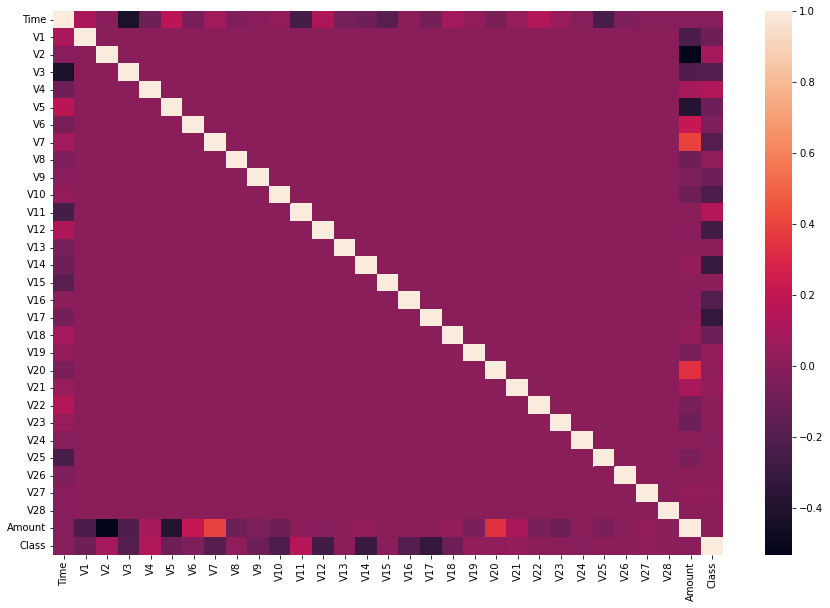

In [6]:
# Correlation analysis
corr = df.corr()
plt.figure(figsize=(15,10))
hm_corr = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

From above chart, we can see there is no feature with high correlation with other features.

In [7]:
# Find feature with very small std
std = df.std()
std

Time      47488.145955
V1            1.958696
V2            1.651309
V3            1.516255
V4            1.415869
V5            1.380247
V6            1.332271
V7            1.237094
V8            1.194353
V9            1.098632
V10           1.088850
V11           1.020713
V12           0.999201
V13           0.995274
V14           0.958596
V15           0.915316
V16           0.876253
V17           0.849337
V18           0.838176
V19           0.814041
V20           0.770925
V21           0.734524
V22           0.725702
V23           0.624460
V24           0.605647
V25           0.521278
V26           0.482227
V27           0.403632
V28           0.330083
Amount      250.120109
Class         0.041527
dtype: float64

Since standard deviation of all features are not small, and there is no high correlation between each feature, so we keep all data.

## Distribution of Each Feature

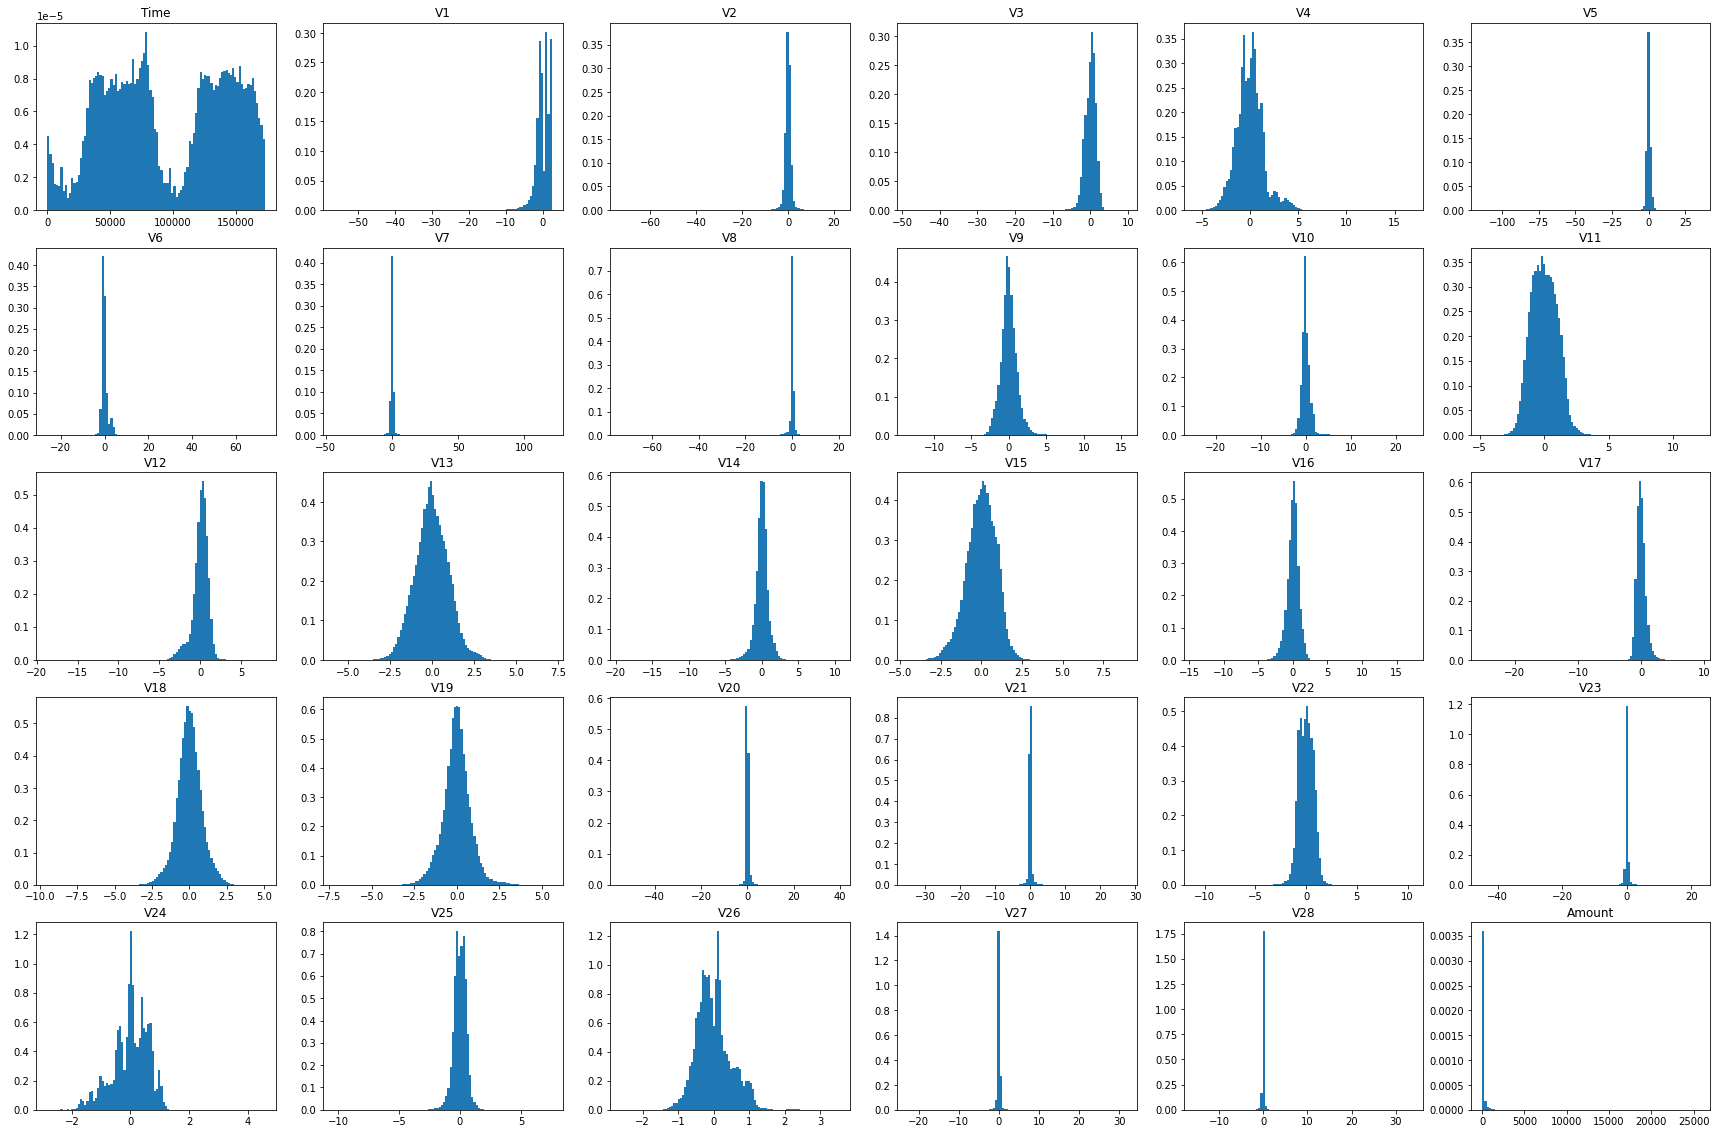

In [8]:
# Plot of distribution
fig, ax = plt.subplots(nrows=5, ncols=6)

i = 0
for row in ax:
    for col in row:
        feature_name = df.columns[i]
        col.hist(df[feature_name], bins=100, density=True)
        col.set_title(feature_name)
        i += 1

fig.set_size_inches(30, 20)
plt.show()

In [9]:
# Normalize the data
df_independent = df.drop('Class', axis=1)
mean = df_independent.mean()
std = df_independent.std()
df_normal = pd.concat([(df_independent - mean)/std, df['Class']], axis=1)

In [10]:
df_normal.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996580,-0.694241,-0.044075,1.672771,0.973364,-0.245116,0.347067,0.193679,0.082637,0.331127,...,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330891,-0.063781,0.244964,0
1,-1.996580,0.608495,0.161176,0.109797,0.316522,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.307376,-0.880075,0.162201,-0.561130,0.320693,0.261069,-0.022256,0.044607,-0.342474,0
2,-1.996558,-0.693499,-0.811576,1.169466,0.268231,-0.364571,1.351451,0.639775,0.207372,-1.378673,...,0.337631,1.063356,1.456317,-1.138090,-0.628536,-0.288446,-0.137137,-0.181021,1.160684,0
3,-1.996558,-0.493324,-0.112169,1.182514,-0.609726,-0.007469,0.936148,0.192070,0.316017,-1.262501,...,-0.147443,0.007267,-0.304776,-1.941024,1.241902,-0.460217,0.155396,0.186188,0.140534,0
4,-1.996537,-0.591329,0.531540,1.021410,0.284655,-0.295015,0.071998,0.479301,-0.226510,0.744325,...,-0.012839,1.100009,-0.220123,0.233250,-0.395201,1.041609,0.543619,0.651815,-0.073403,0


# Data Resampling

In [11]:
# Count of fraud and not fraud
nofraud = df_normal[df_normal['Class']==0]
fraud = df_normal[df_normal['Class']==1]
nofraud.shape, fraud.shape

((284315, 31), (492, 31))

Since number of fraud transactions is much smaller than that of not fraud, so we need to do the resampling in order to balance the data.

## Upsample Minority

In [12]:
from sklearn.utils import resample
# Upsampling
fraud_upsampled = resample(fraud, replace=True, n_samples=len(nofraud), random_state=0) 
upsampled = pd.concat([nofraud, fraud_upsampled])

In [13]:
# check new class counts
upsampled['Class'].value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [14]:
# Split the data with 80% training data, 20% test data
from sklearn.model_selection import train_test_split
x_train_upsample, x_test_upsample, y_train_upsample, y_test_upsample = train_test_split(upsampled.drop('Class',axis=1), upsampled['Class'], test_size=0.2, random_state=0)
x_train_upsample.shape, x_test_upsample.shape, y_train_upsample.shape, y_test_upsample.shape

((454904, 30), (113726, 30), (454904,), (113726,))

## Downsample Majority

In [15]:
# Downsampling
fraud_downsampled = resample(nofraud, replace=False, n_samples=len(fraud), random_state=0) 
downsampled = pd.concat([fraud, fraud_downsampled])

In [16]:
# check new class counts
downsampled['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [17]:
# Split the data with 80% training data, 20% test data
x_train_downsampled, x_test_downsampled, y_train_downsampled, y_test_downsampled = train_test_split(downsampled.drop('Class',axis=1), downsampled['Class'], test_size=0.2, random_state=0)
x_train_downsampled.shape, x_test_downsampled.shape, y_train_downsampled.shape, y_test_downsampled.shape

((787, 30), (197, 30), (787,), (197,))

## Synthetic Minority Oversampling Technique (SMOTE)

In [18]:
# SMOTE
from imblearn.over_sampling import SMOTE
x_train, x_test, y_train, y_test = train_test_split(df_normal.drop('Class',axis=1), df_normal['Class'], test_size=0.2, random_state=0)
sm = SMOTE()
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)
x_train_sm.shape, x_test.shape, y_train_sm.shape, y_test.shape

((454908, 30), (56962, 30), (454908,), (56962,))

# Machine Learning Models

## Logistic Regression

In [19]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

logis_up = LogisticRegression()
logis_up.fit(x_train_upsample, y_train_upsample)
logis_up_pred = logis_up.predict(x_test_upsample)
logis_up_fp, logis_up_tp, logis_up_threshold = roc_curve(y_test_upsample, logis_up_pred)
auc_log_up = auc(logis_up_fp, logis_up_tp)
recall_log_up = recall_score(y_test_upsample, logis_up_pred)

logis_down = LogisticRegression()
logis_down.fit(x_train_downsampled, y_train_downsampled)
logis_down_pred = logis_down.predict(x_test_downsampled)
logis_down_fp, logis_down_tp, logis_down_threshold = roc_curve(y_test_downsampled, logis_down_pred)
auc_log_down = auc(logis_down_fp, logis_down_tp)
recall_log_down = recall_score(y_test_downsampled, logis_down_pred)

logis_smote = LogisticRegression()
logis_smote.fit(x_train_sm, y_train_sm)
logis_smote_pred = logis_smote.predict(x_test)
logis_smote_fp, logis_smote_tp, logis_smote_threshold = roc_curve(y_test, logis_smote_pred)
auc_log_sm = auc(logis_smote_fp, logis_smote_tp)
recall_log_sm = recall_score(y_test, logis_smote_pred)

In [20]:
recall_log_up, recall_log_down, recall_log_sm

(0.9235788328977601, 0.945054945054945, 0.9405940594059405)

In [21]:
auc_log_up, auc_log_down, auc_log_sm

(0.9511040356719859, 0.9583765291312462, 0.9579511335702958)

In [22]:
# Stat Report for logistic (Upsampling)
from sklearn.metrics import classification_report
logis_up_report = classification_report(y_test_upsample, logis_up_pred)
print(logis_up_report)

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     56713
           1       0.98      0.92      0.95     57013

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726



In [23]:
# Stat Report for logistic (Downsampling)
logis_down_report = classification_report(y_test_downsampled, logis_down_pred)
print(logis_down_report)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       106
           1       0.97      0.95      0.96        91

    accuracy                           0.96       197
   macro avg       0.96      0.96      0.96       197
weighted avg       0.96      0.96      0.96       197



In [24]:
# Stat Report for logistic (SMOTE)
logis_smote_report = classification_report(y_test, logis_smote_pred)
print(logis_smote_report)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56861
           1       0.06      0.94      0.12       101

    accuracy                           0.98     56962
   macro avg       0.53      0.96      0.55     56962
weighted avg       1.00      0.98      0.99     56962



## Decision Tree

In [25]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt_up = DecisionTreeClassifier()
dt_up.fit(x_train_upsample, y_train_upsample)
dt_up_pred = dt_up.predict(x_test_upsample)
dt_up_fp, dt_up_tp, dt_up_threshold = roc_curve(y_test_upsample, dt_up_pred)
auc_dt_up = auc(dt_up_fp, dt_up_tp)
recall_dt_up = recall_score(y_test_upsample, dt_up_pred)

dt_down = DecisionTreeClassifier()
dt_down.fit(x_train_downsampled, y_train_downsampled)
dt_down_pred = dt_down.predict(x_test_downsampled)
dt_down_fp, dt_down_tp, dt_down_threshold = roc_curve(y_test_downsampled, dt_down_pred)
auc_dt_down = auc(dt_down_fp, dt_down_tp)
recall_dt_down = recall_score(y_test_downsampled, dt_down_pred)

dt_smote = DecisionTreeClassifier()
dt_smote.fit(x_train_sm, y_train_sm)
dt_smote_pred = dt_smote.predict(x_test)
dt_smote_fp, dt_smote_tp, dt_smote_threshold = roc_curve(y_test, dt_smote_pred)
auc_dt_sm = auc(dt_smote_fp, dt_smote_tp)
recall_dt_sm = recall_score(y_test, dt_smote_pred)

In [26]:
recall_dt_up, recall_dt_down, recall_dt_sm

(1.0, 0.9120879120879121, 0.8118811881188119)

In [27]:
auc_dt_up, auc_dt_down, auc_dt_sm

(0.9997002450937175, 0.9183081069873522, 0.9047710754086612)

In [28]:
# Stat Report for Decision Tree (Upsampling)
dt_up_report = classification_report(y_test_upsample, dt_up_pred)
print(dt_up_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56713
           1       1.00      1.00      1.00     57013

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [29]:
# Stat Report for Decision Tree (Downsampling)
dt_down_report = classification_report(y_test_downsampled, dt_down_pred)
print(dt_down_report)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       106
           1       0.91      0.91      0.91        91

    accuracy                           0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197



In [30]:
# Stat Report for Decision Tree (SMOTE)
dt_smote_report = classification_report(y_test, dt_smote_pred)
print(dt_smote_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.38      0.81      0.52       101

    accuracy                           1.00     56962
   macro avg       0.69      0.90      0.76     56962
weighted avg       1.00      1.00      1.00     56962



## Gaussian Naive Bayes

In [31]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

GaussianNB_up = GaussianNB()
GaussianNB_up.fit(x_train_upsample, y_train_upsample)
GaussianNB_up_pred = GaussianNB_up.predict(x_test_upsample)
GaussianNB_up_fp, GaussianNB_up_tp, GaussianNB_up_threshold = roc_curve(y_test_upsample, GaussianNB_up_pred)
auc_GaussianNB_up = auc(GaussianNB_up_fp, GaussianNB_up_tp)
recall_GaussianNB_up = recall_score(y_test_upsample, GaussianNB_up_pred)

GaussianNB_down = GaussianNB()
GaussianNB_down.fit(x_train_downsampled, y_train_downsampled)
GaussianNB_down_pred = GaussianNB_down.predict(x_test_downsampled)
GaussianNB_down_fp, GaussianNB_down_tp, GaussianNB_down_threshold = roc_curve(y_test_downsampled, GaussianNB_down_pred)
auc_GaussianNB_down = auc(GaussianNB_down_fp, GaussianNB_down_tp)
recall_GaussianNB_down = recall_score(y_test_downsampled, GaussianNB_down_pred)

GaussianNB_smote = GaussianNB()
GaussianNB_smote.fit(x_train_sm, y_train_sm)
GaussianNB_smote_pred = GaussianNB_smote.predict(x_test)
GaussianNB_smote_fp, GaussianNB_smote_tp, GaussianNB_smote_threshold = roc_curve(y_test, GaussianNB_smote_pred)
auc_GaussianNB_sm = auc(GaussianNB_smote_fp, GaussianNB_smote_tp)
recall_GaussianNB_smote = recall_score(y_test, GaussianNB_smote_pred)

In [32]:
recall_GaussianNB_up, recall_GaussianNB_down, recall_GaussianNB_smote

(0.8588567519688493, 0.8571428571428571, 0.8811881188118812)

In [33]:
auc_GaussianNB_up, auc_GaussianNB_down, auc_GaussianNB_sm

(0.9162744253910863, 0.9097035040431267, 0.9286966253122735)

In [34]:
# Stat Report for Gaussian Naive Bayes (Upsampling)
GaussianNB_up_report = classification_report(y_test_upsample, GaussianNB_up_pred)
print(GaussianNB_up_report)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92     56713
           1       0.97      0.86      0.91     57013

    accuracy                           0.92    113726
   macro avg       0.92      0.92      0.92    113726
weighted avg       0.92      0.92      0.92    113726



In [35]:
# Stat Report for Gaussian Naive Bayes (Downsampling)
GaussianNB_down_report = classification_report(y_test_downsampled, GaussianNB_down_pred)
print(GaussianNB_down_report)

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       106
           1       0.95      0.86      0.90        91

    accuracy                           0.91       197
   macro avg       0.92      0.91      0.91       197
weighted avg       0.92      0.91      0.91       197



In [36]:
# Stat Report for Gaussian Naive Bayes (SMOTE)
GaussianNB_smote_report = classification_report(y_test, GaussianNB_smote_pred)
print(GaussianNB_smote_report)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56861
           1       0.06      0.88      0.12       101

    accuracy                           0.98     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.98      0.99     56962



## Random Forest

In [37]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_up = RandomForestClassifier()
rf_up.fit(x_train_upsample, y_train_upsample)
rf_up_pred = rf_up.predict(x_test_upsample)
rf_up_fp, rf_up_tp, rf_up_threshold = roc_curve(y_test_upsample, rf_up_pred)
auc_rf_up = auc(rf_up_fp, rf_up_tp)
recall_rf_up = recall_score(y_test_upsample, rf_up_pred)

rf_down = RandomForestClassifier()
rf_down.fit(x_train_downsampled, y_train_downsampled)
rf_down_pred = rf_down.predict(x_test_downsampled)
rf_down_fp, rf_down_tp, rf_down_threshold = roc_curve(y_test_downsampled, rf_down_pred)
auc_rf_down = auc(rf_down_fp, rf_down_tp)
recall_rf_down = recall_score(y_test_downsampled, rf_down_pred)

rf_smote = RandomForestClassifier()
rf_smote.fit(x_train_sm, y_train_sm)
rf_smote_pred = rf_smote.predict(x_test)
rf_smote_fp, rf_smote_tp, rf_smote_threshold = roc_curve(y_test, rf_smote_pred)
auc_rf_sm = auc(rf_smote_fp, rf_smote_tp)
recall_rf_smote = recall_score(y_test, rf_smote_pred)

In [38]:
recall_rf_up, recall_rf_down, recall_rf_smote

(1.0, 0.9340659340659341, 0.8415841584158416)

In [39]:
auc_rf_up, auc_rf_down, auc_rf_sm

(0.9999118367922699, 0.9575990047688161, 0.9206865587281543)

In [40]:
# Stat Report for Random Forest (Upsampling)
rf_up_report = classification_report(y_test_upsample, rf_up_pred)
print(rf_up_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56713
           1       1.00      1.00      1.00     57013

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [41]:
# Stat Report for Random Forest (Downsampling)
rf_down_report = classification_report(y_test_downsampled, rf_down_pred)
print(rf_down_report)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       106
           1       0.98      0.93      0.96        91

    accuracy                           0.96       197
   macro avg       0.96      0.96      0.96       197
weighted avg       0.96      0.96      0.96       197



In [42]:
# Stat Report for Random Forest (SMOTE)
rf_smote_report = classification_report(y_test, rf_smote_pred)
print(rf_smote_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.88      0.84      0.86       101

    accuracy                           1.00     56962
   macro avg       0.94      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962



## Model Evaluation

In [45]:
# Model Evaluation
model_evaluation = pd.DataFrame({
    'Model': ['Logistic Regression with upsample', 'Logistic Regression with downsample','Logistic Regression with SMOTE',
              'Decision Tree with upsample','Decision Tree with downsample','Decision Tree with SMOTE',
              'Random Forest with upsample','Random Forest with downsample','Random Forest with SMOTE', 
              'Gaussian Naive Bayes with upsample', 'Gaussian Naive Bayes with downsample','Gaussian Naive Bayes with SMOTE'
              ],
    'Recall': [recall_log_up, recall_log_down, recall_log_sm, 
              recall_dt_up, recall_dt_down, recall_dt_sm,
              recall_GaussianNB_up, recall_GaussianNB_down, recall_GaussianNB_smote, 
              recall_rf_up, recall_rf_down, recall_rf_smote]})
model_evaluation.sort_values(by='Recall', ascending=False).reset_index()[['Model', 'Recall']]

,Model,Recall
0,Decision Tree with upsample,1.000000
1,Gaussian Naive Bayes with upsample,1.000000
2,Logistic Regression with downsample,0.945055
3,Logistic Regression with SMOTE,0.940594
4,Gaussian Naive Bayes with downsample,0.934066
5,Logistic Regression with upsample,0.923579
6,Decision Tree with downsample,0.912088
7,Random Forest with SMOTE,0.881188
8,Random Forest with upsample,0.858857
9,Random Forest with downsample,0.857143


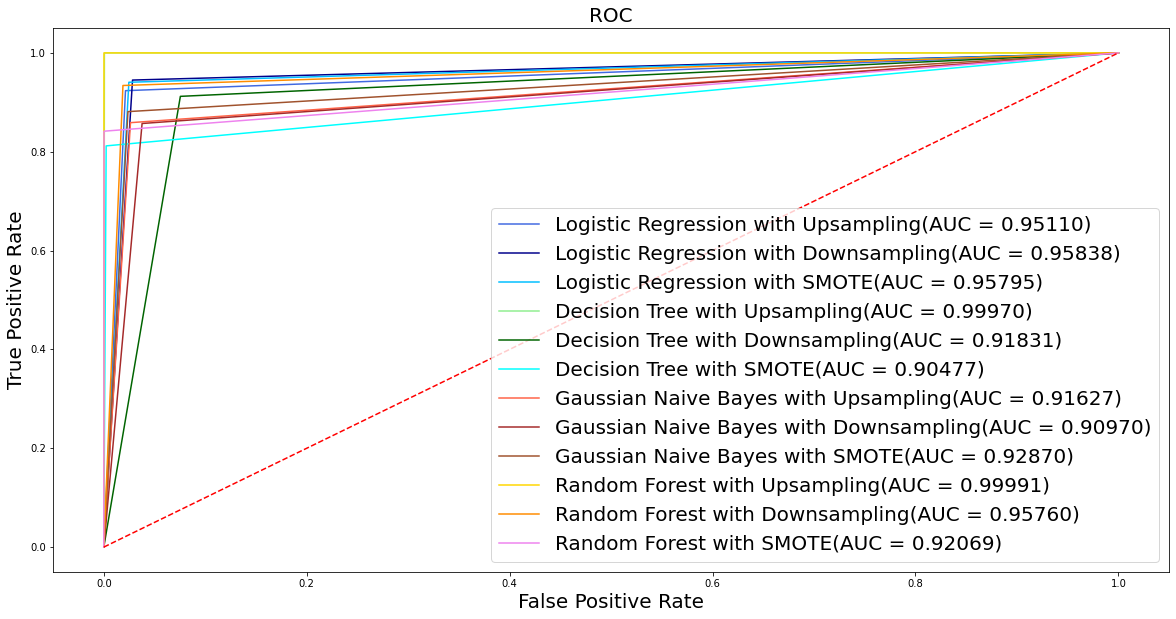

In [46]:
# ROC and AUC

plt.figure(figsize=(20,10))

plt.plot(logis_up_fp, logis_up_tp, color = 'royalblue', label='Logistic Regression with Upsampling(AUC = %0.5f)' % auc_log_up)
plt.plot(logis_down_fp, logis_down_tp, color = 'darkblue', label='Logistic Regression with Downsampling(AUC = %0.5f)' % auc_log_down)
plt.plot(logis_smote_fp, logis_smote_tp, color = 'deepskyblue', label='Logistic Regression with SMOTE(AUC = %0.5f)' % auc_log_sm)

plt.plot(dt_up_fp, dt_up_tp, color = 'lightgreen', label='Decision Tree with Upsampling(AUC = %0.5f)' % auc_dt_up)
plt.plot(dt_down_fp, dt_down_tp, color = 'darkgreen', label='Decision Tree with Downsampling(AUC = %0.5f)' % auc_dt_down)
plt.plot(dt_smote_fp, dt_smote_tp, color = 'cyan', label='Decision Tree with SMOTE(AUC = %0.5f)' % auc_dt_sm)

plt.plot(GaussianNB_up_fp, GaussianNB_up_tp, color = 'tomato', label='Gaussian Naive Bayes with Upsampling(AUC = %0.5f)' % auc_GaussianNB_up)
plt.plot(GaussianNB_down_fp, GaussianNB_down_tp, color = 'brown', label='Gaussian Naive Bayes with Downsampling(AUC = %0.5f)' % auc_GaussianNB_down)
plt.plot(GaussianNB_smote_fp, GaussianNB_smote_tp, color = 'sienna', label='Gaussian Naive Bayes with SMOTE(AUC = %0.5f)' % auc_GaussianNB_sm)

plt.plot(rf_up_fp, rf_up_tp, color = 'gold', label='Random Forest with Upsampling(AUC = %0.5f)' % auc_rf_up)
plt.plot(rf_down_fp, rf_down_tp, color = 'darkorange', label='Random Forest with Downsampling(AUC = %0.5f)' % auc_rf_down)
plt.plot(rf_smote_fp, rf_smote_tp, color = 'violet', label='Random Forest with SMOTE(AUC = %0.5f)' % auc_rf_sm)

plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
plt.title('ROC', fontsize=20)
plt.legend(loc="lower right", fontsize=20)
plt.show()